In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
sns.set()

In [2]:
df = pd.read_csv('data/responses.csv')
df = df.fillna(-1.0)
df.shape

(1010, 150)

Hobbies data

In [3]:
MUSIC_IDS = range(19)
MOVIES_IDS = range(19,31)
HOBBIES_IDS = range(31,63)
PHOBIAS_IDS = range(63,73)
HEALTH_IDS = range(73,76)
PERSONALITY_IDS = range(76,133)
HABITS_IDS = range(133,140)
DEMOGRAPHICS_IDS = range(140,150)

In [4]:
phobias_cols = df.columns[PHOBIAS_IDS]
phobias = df[phobias_cols]
phobias

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0
3,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0
4,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1005,1.0,2.0,4.0,5.0,2.0,2,2.0,3.0,3.0,4.0
1006,1.0,1.0,1.0,1.0,1.0,1,1.0,2.0,5.0,5.0
1007,2.0,1.0,3.0,2.0,2.0,2,1.0,1.0,1.0,5.0
1008,2.0,3.0,2.0,5.0,3.0,3,3.0,3.0,5.0,5.0


In [5]:
music_cols = df.columns[MUSIC_IDS]
music = df[music_cols]
music

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,4.0,3.0,3.0,2.0
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0,4.0,1.0
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,2.0,2.0,5.0,1.0,1.0,1.0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,3.0,2.0,5.0,2.0,2.0,1.0


In [6]:
movies_cols = df.columns[MOVIES_IDS]
movies = df[movies_cols]
movies

,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0
1006,5.0,2.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0
1007,4.0,5.0,5.0,3.0,5.0,2.0,1.0,4.0,4.0,3.0,1.0,3.0
1008,5.0,3.0,4.0,5.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,4.0


In [7]:
HOBBIES_IDS = range(31,63)
hobbies_cols = df.columns[HOBBIES_IDS]
hobbies = df[hobbies_cols]
hobbies

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,...,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
1006,4.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,2.0,1.0,...,1.0,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0
1007,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
1008,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,...,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


Demographics data

In [8]:
DEMOGRAPHICS_IDS = range(143,150) # without age, weight and height
demographics_cols = df.columns[DEMOGRAPHICS_IDS]
demographics = df[demographics_cols]

gender_mapping = {'female': 0.0, 'male': 1.0}
left_right_handed_mapping = {'left handed': 0.0, 'right handed': 1.0}
education_mapping = {'currently a primary school pupil': 0.0, 'primary school': 1.0, 'secondary school': 2.0,
                     'college/bachelor degree': 3.0, 'masters degree': 4.0, 'doctorate degree': 5.0}
only_child_mapping = {'no': 0.0, 'yes': 1.0}
village_town_mapping = {'city': 0.0, 'village': 1.0}
house_block_of_flats_mapping = {'block of flats': 0.0, 'house/bungalow': 1.0}
demographics = demographics.replace(
    {'Gender': gender_mapping,
     'Left - right handed': left_right_handed_mapping,
     'Education': education_mapping,
     'Only child': only_child_mapping,
     'Village - town': village_town_mapping,
     'House - block of flats': house_block_of_flats_mapping})
demographics

,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1.0,0.0,1.0,3.0,0.0,1.0,0.0
1,2.0,0.0,1.0,3.0,0.0,0.0,0.0
2,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,1.0,0.0,1.0,3.0,1.0,0.0,1.0
4,1.0,0.0,1.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
1005,1.0,0.0,1.0,2.0,0.0,0.0,1.0
1006,5.0,1.0,0.0,4.0,0.0,1.0,1.0
1007,0.0,0.0,1.0,2.0,1.0,0.0,0.0
1008,1.0,0.0,1.0,3.0,0.0,0.0,0.0


We use TSNE to visually inspect the data, looking for clusters. Unfortunately we don't find any.

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS

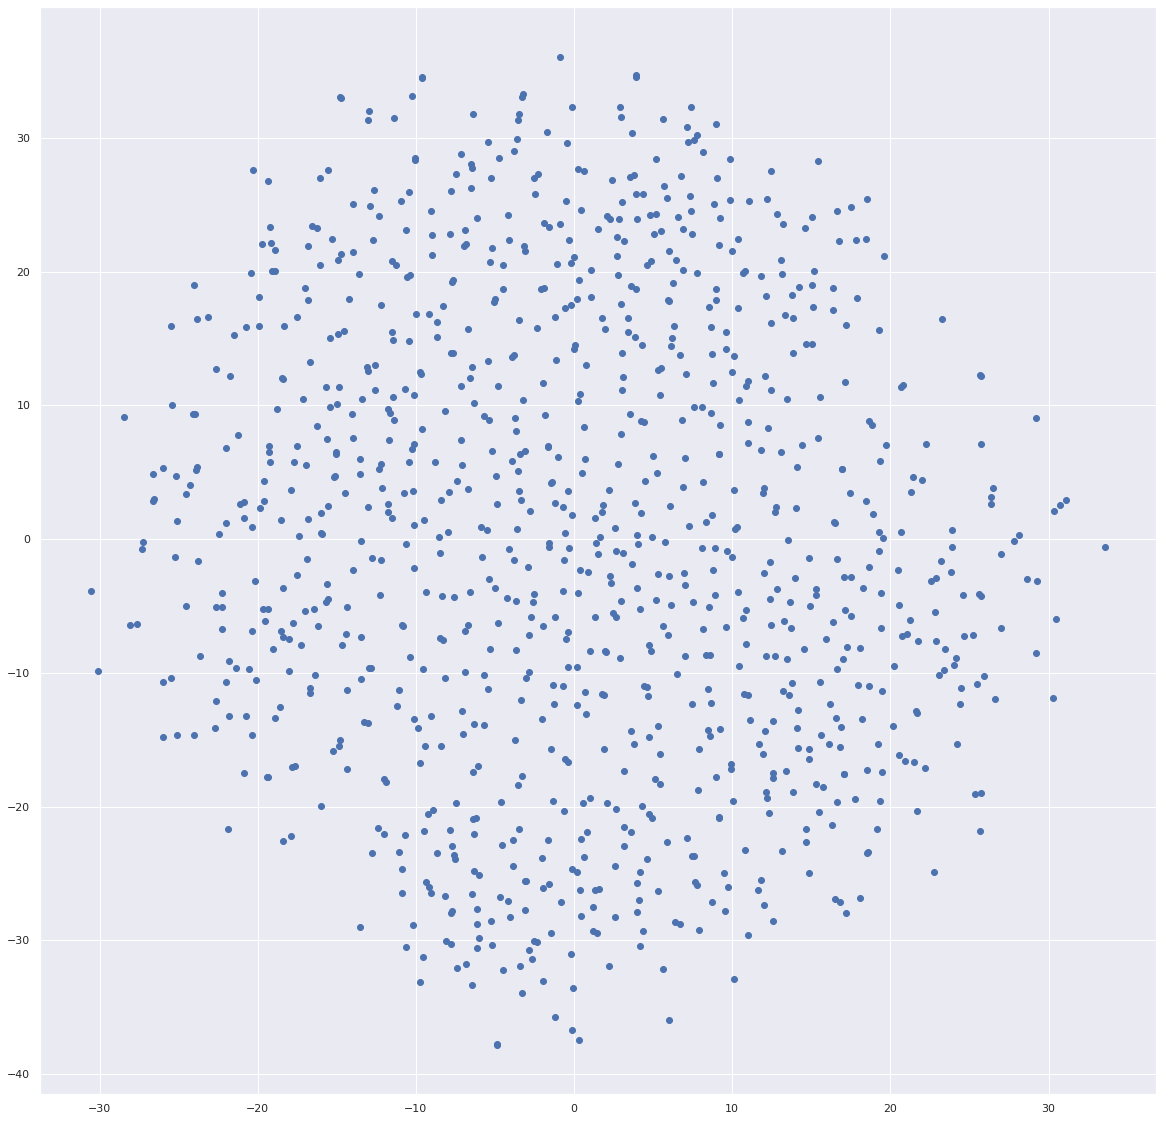

In [10]:
hobbies_transformed = TSNE(n_components=2).fit_transform(hobbies)
fig = plt.figure()
plt.scatter(hobbies_transformed[:, 0], hobbies_transformed[:, 1])
fig.set_size_inches(20,20)

In [14]:
df["Rats"]

0       3.0
1       1.0
2       1.0
3       5.0
4       2.0
       ... 
1005    2.0
1006    1.0
1007    1.0
1008    3.0
1009    2.0
Name: Rats, Length: 1010, dtype: float64

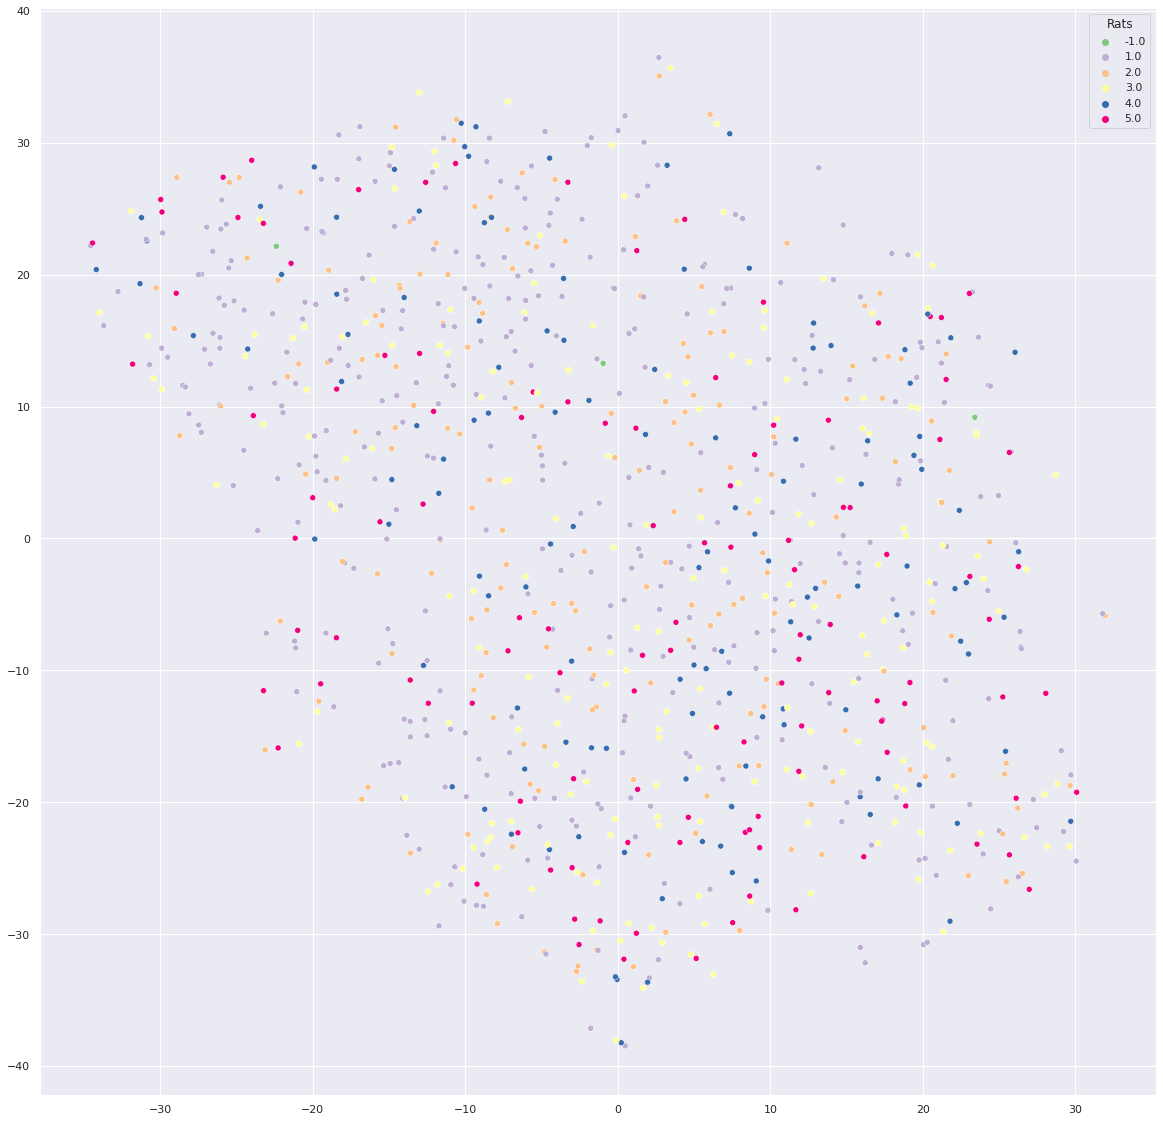

In [18]:
X = TSNE(n_components=2, init='pca').fit_transform(music)
fig = plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df["Rats"], palette="Accent")
fig.set_size_inches(20,20)

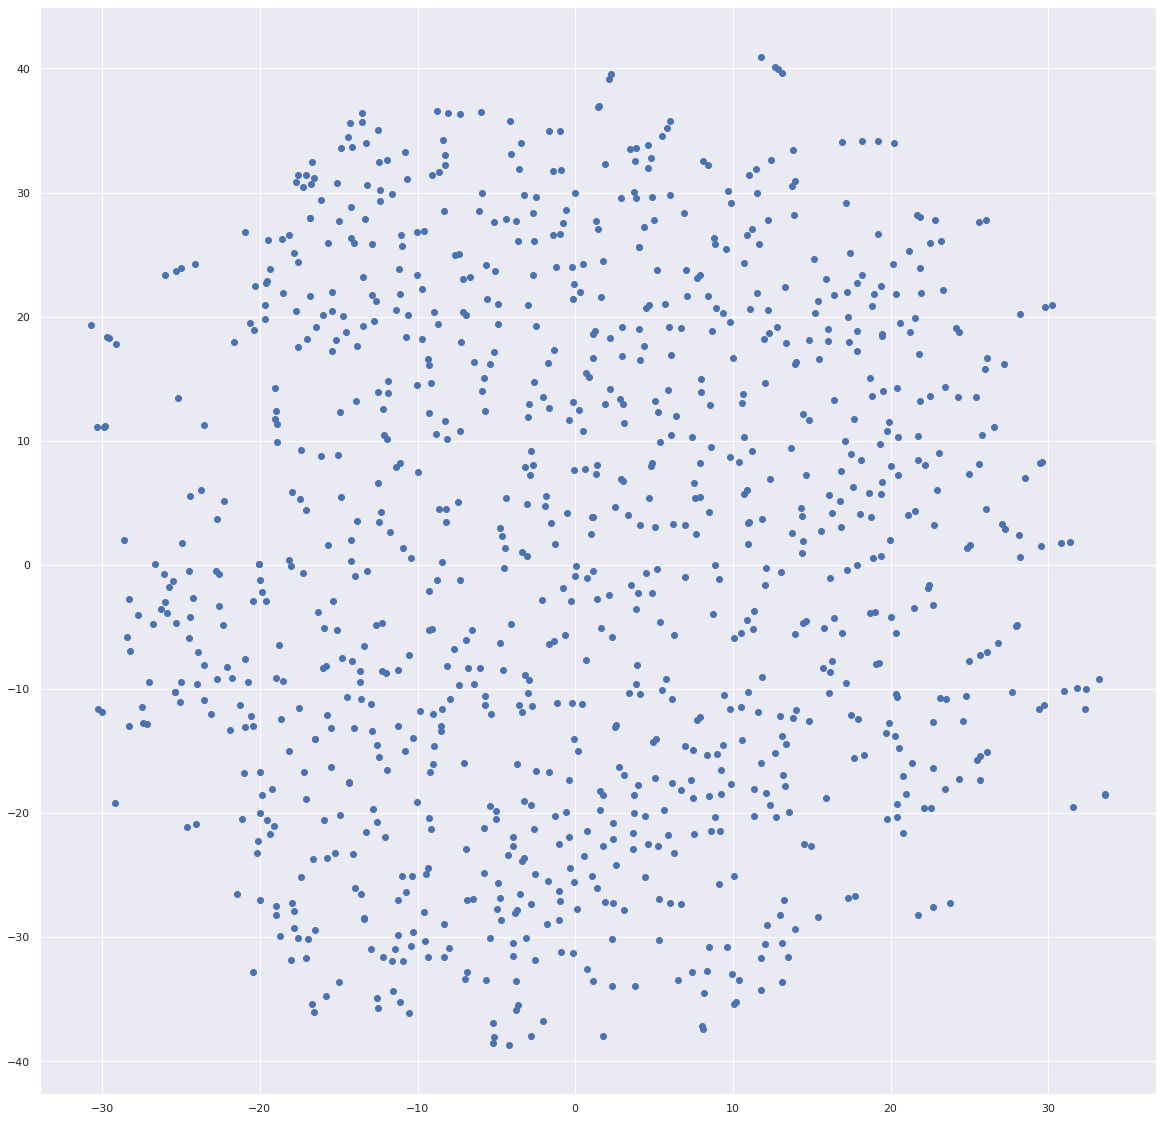

In [12]:
X = TSNE(n_components=2).fit_transform(movies)
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1])
fig.set_size_inches(20,20)

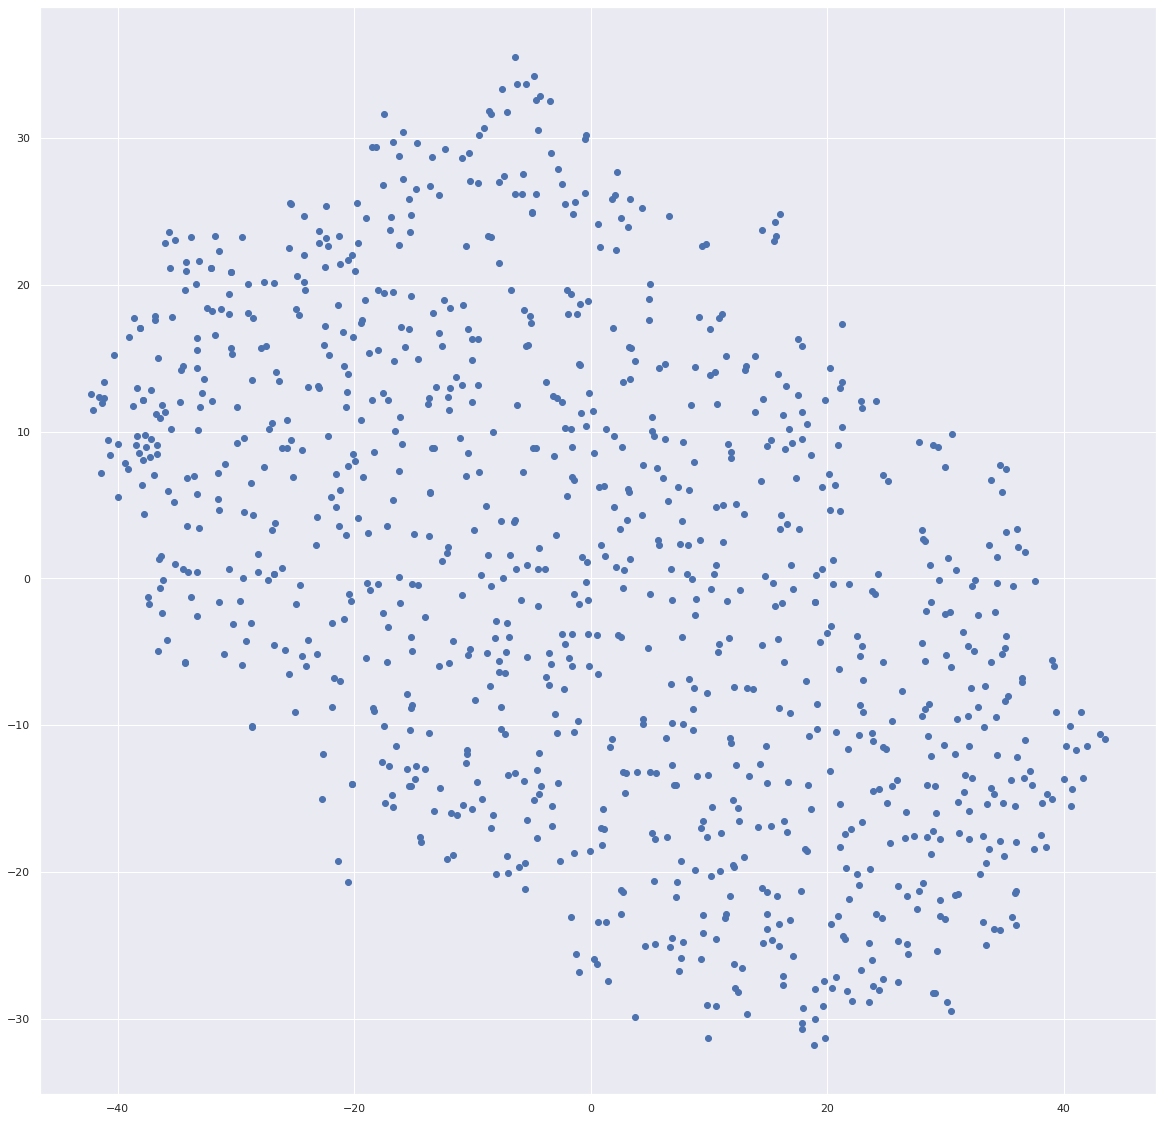

In [13]:
X = TSNE(n_components=2).fit_transform(phobias)
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1])
fig.set_size_inches(20,20)